 **QUESTION WE SOLVE ON ZOMATOT DATASET**

# *QUES 1* = What type of restaurant do the majority of customer order from?

## QUES 2 = How many votes has each type of restaurant  recieved from customer?

## QUES 3 = What are the rating that the majority of restaurant have recieved?

# QUES 4 = Zomato has observed that most couplre order most of their food online. what is their average spending on each order?

# QUES 5 = Which mode ( online or offline) has received maximum rating ?

# QUES 6 = Which type of restaurant received more offline order , so        that Zomato can provide offer to the customer,
```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/Zomato data .csv")
print(dataset)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
def rating(value):
  value= str(value).split("/")[0]
  try:
    value=float(value)
  except:
    value=np.nan
  return value



In [ ]:
dataset['rate'] = dataset['rate'].apply(rating)
print(dataset.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# QUESTION NO.1


Text(0.5, 0, 'Type of restaurant')

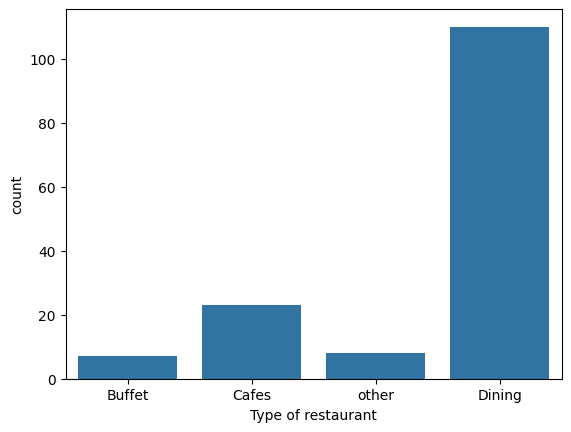

In [ ]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion :- Majority of the restaurant falls in Dining Category

# QUESTION NO.2

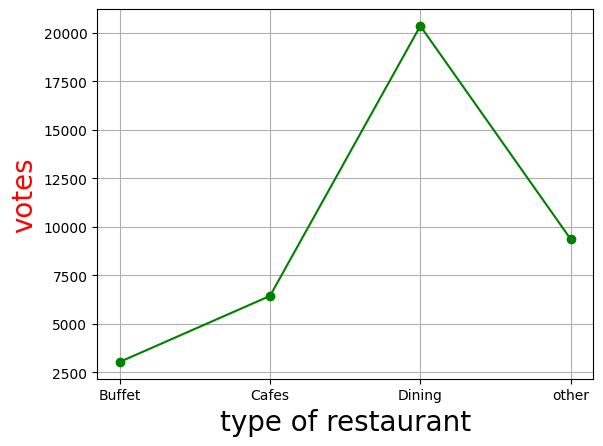

In [ ]:
grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})

plt.xlabel("type of restaurant", c='black' , size = 20)
plt.ylabel("votes", c='red', size = 20)
plt.plot(result, c="green", marker = "o")
plt.grid()


Conclusion :- Dining restaurant has recieved maximum votes

# QUESTION NO.3

Text(0.5, 1.0, 'rating acc. to customer')

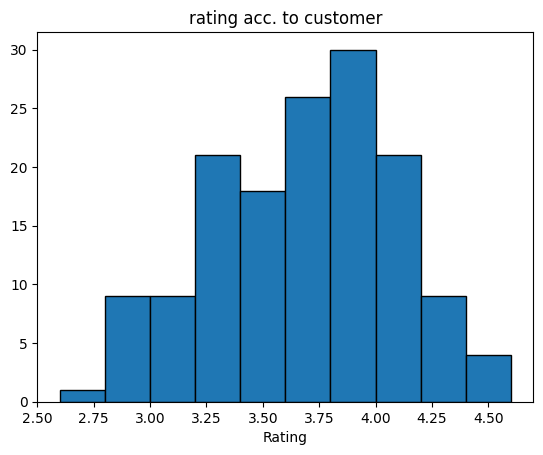

In [ ]:
plt.hist(dataset['rate'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.title("rating acc. to customer")

Conclusion:= the majority restaurant recieved rating from 3.5 to 4

# QUESTION NO.4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

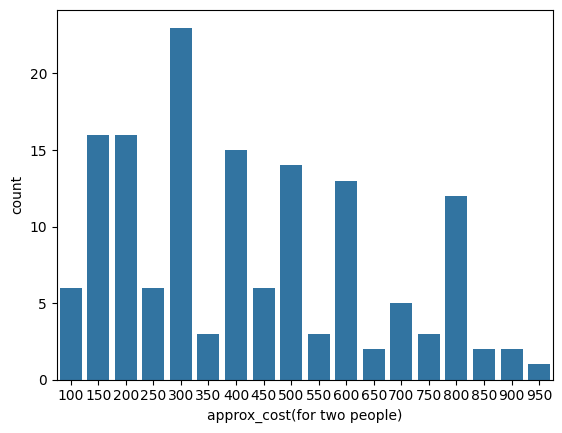

In [ ]:
couple= dataset['approx_cost(for two people)']
sns.countplot(x=couple)

Conclusion:= the majority of couple preffer restaurant with an approxiate cost of 300 rupess


# QUESTION NO.5


<Axes: xlabel='online_order', ylabel='rate'>

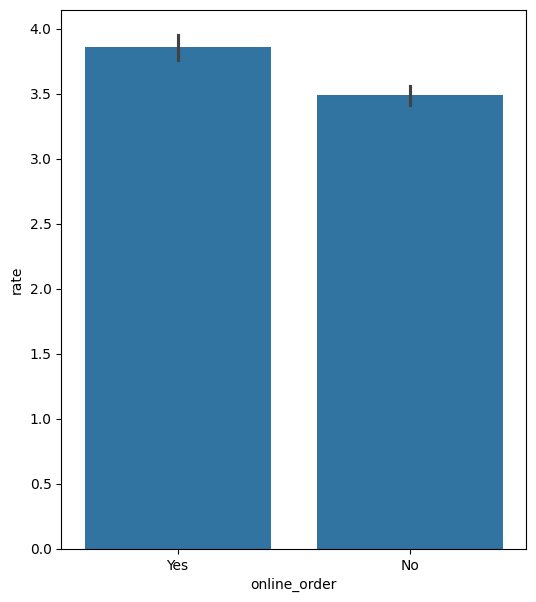

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x='online_order', y='rate', data=dataset)

Conclusion:= offline order recives lower rating as compare to online


#QUESTION NO.6

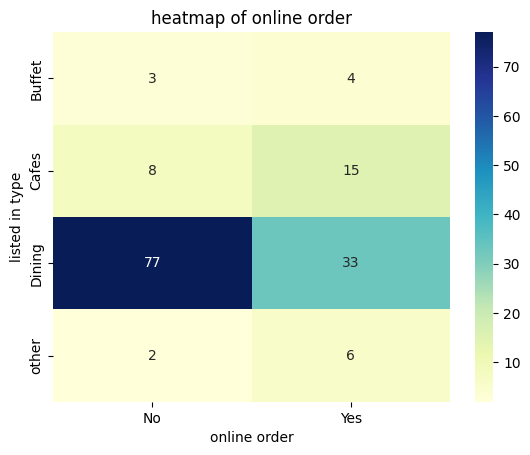

In [ ]:
pivot_table= dataset.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("heatmap of online order")
plt.xlabel("online order")
plt.ylabel("listed in type")
plt.show()